In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_71013_Z')

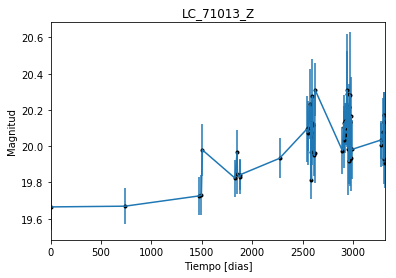

In [2]:
data = np.genfromtxt('LC_71013_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_71013_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

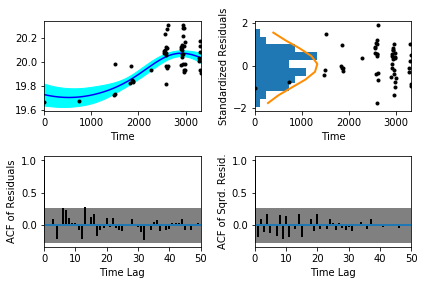

In [5]:
sample.assess_fit()

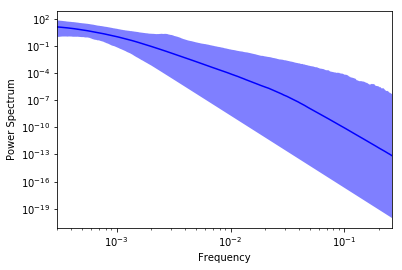

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_71013_Z')

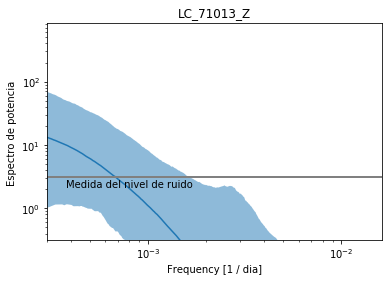

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_71013_Z')

Text(0.5,1,'Prediccion , valor esperado 71013_Z')

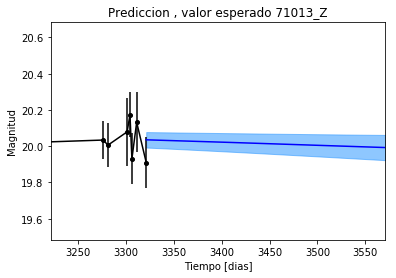

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado 71013_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_71013_Z')

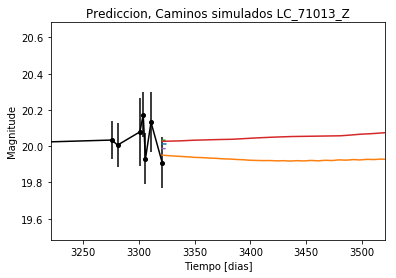

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_71013_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_71013_Z')

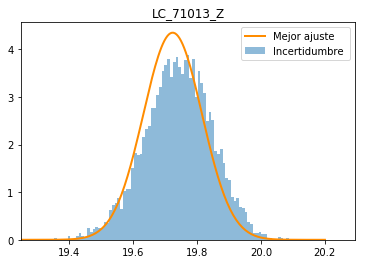

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_71013_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_Z')

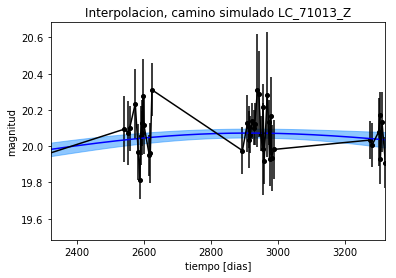

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_71013_Z')

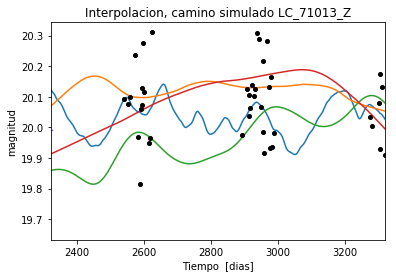

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_71013_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 229.655151289
Median: 0.00497795328883
Standard deviation: 0.0981317936813
68% credibility interval: [ 0.00046412  0.10329796]
95% credibility interval: [  3.19206961e-04   3.76262164e-01]
99% credibility interval: [  3.03671966e-04   4.98054402e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1853.30910404
Median: 0.000593836732147
Standard deviation: 0.0313581611136
68% credibility interval: [ 0.00034685  0.00536508]
95% credibility interval: [ 0.00030793  0.06086363]
99% credibility interval: [ 0.00030215  0.23235285]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 171.898256836
Median: 0.0075533078235
Standard deviati

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 429.752037001
Median: 54.5441834743
Standard deviation: 2.0721548605
68% credibility interval: [ 52.20305041  56.26228473]
95% credibility interval: [ 49.31435242  57.18096944]
99% credibility interval: [ 47.47687887  57.69634541]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 512.620105618
Median: 0.350817664458
Standard deviation: 0.97511158222
68% credibility interval: [ 0.02749416  1.75646748]
95% credibility interval: [ 0.00993773  3.26608333]
99% credibility interval: [ 0.008591    4.53752161]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 574.230794502
Median: 0.0270777775731
Standard deviation: 1.73073396011
68% credibility interval: [ 0.00138978  0.78642245]
95% credibility interval: [  5.44132068e-

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 4.28535674721e-27
Standard deviation: 2.43654455925e+91
68% credibility interval: [  1.17327400e-43   1.87416299e-08]
95% credibility interval: [  2.44099101e-106   9.46411358e+015]
99% credibility interval: [  3.43567719e-165   9.57009224e+063]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1267.76449314
Median: 19.8763616242
Standard deviation: 0.102257758156
68% credibility interval: [ 19.78107984  19.95787362]
95% credibility interval: [ 19.66195466  20.05850558]
99% credibility interval: [ 19.51778507  20.17424084]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 390.144582349
Median: 0.000102620908939
Standard deviation: 0.0980112591049
68% credibility interval: [ 0.          0.06408178]
95% credibility interval: [ 0.          0.39706688]
99% credibility interval: [ 0.          0.49978604]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 390.144582349
Median: 0.000102620908939
Standard deviation: 0.0980112591049
68% credibility interval: [ 0.          0.06408178]
95% credibility interval: [ 0.          0.39706688]
99% credibility interval: [ 0.          0.49978604]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 466.974725867
Median: 0.0
Standard deviation: 0.000506405282151


In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 429.752037001
Median: 54.5441834743
Standard deviation: 2.0721548605
68% credibility interval: [ 52.20305041  56.26228473]
95% credibility interval: [ 49.31435242  57.18096944]
99% credibility interval: [ 47.47687887  57.69634541]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 804.067912287
Median: 0.0222547226911
Standard deviation: 0.0302374520096
68% credibility interval: [ 0.01146418  0.04557739]
95% credibility interval: [ 0.00654381  0.1072588 ]
99% credibility interval: [ 0.00432782  0.19285582]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1246.7951777
Median: 0.825548804707
Standard deviation: 0.12028554766
68% credibility interval: [ 0.71793312  0.9491293 ]
95% credibility interval: [ 0.63089008  1.10185157]
99% credibility interval: [ 0.58091575  1.21969203]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1676.17759812
Median: 1.5030836124e-06
Standard deviation: 0.00570671436895
68% credibility interval: [  2.45707358e-08   1.22381189e-04]
95% credibility interval: [  1.56628300e-20   2.16968826e-03]
99% credibility interval: [  1.30884571e-68   2.37519619e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 229.655151289
Median: (-0.0312774029642-0.304408040876j)
Standard deviation: 0.871440787207
68% credibility interval: [-0.64904023+0.j         -0.00291617-0.00179787j]
95% credibility interval: [ -2.36412490e+00+0.j         -2.00563649e-03-0.0025734j]
99% credibility interval: [ -3.12936810e+00+0.j          -1.90802724e-03-0.00087283j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1853.30910404
Median: (-0.00373118623029+0.00711428198042j)
Standard deviation: 0.646574302716
68% credibility interval: [-0.03370982+0.00656268j -0.00217933+0.00060859j]
95% credibility interval: [-0.38241744+0.12034791j -0.00193478+0.j        ]
99% credibility interval: [-1.45991604+2.63966j -0.00189845+0.j     ]
Posterior summary for par